In [1]:
!pfda download file-GkP81gQ07qQk61YzVyy19J2j-1
!pfda download file-GkP81gj07qQjP2G84qfGjY0P-1
!pfda download file-GkP81j007qQy06B083K6p57p-1
!pfda download file-Gv2Fx2j07qQvvKQ7YVp25F7X-1

>> Preparing to download
     File Size :  1.521KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/gen1_heavy_9cls_uni.csv
                  100.0% (1.521KiB of 1.521KiB)
>> Done!

>> Preparing to download
     File Size :  1.528KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/gen2_heavy_9cls_uni.csv
                  100.0% (1.528KiB of 1.528KiB)
>> Done!

>> Preparing to download
     File Size :  1.492KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/miseq_heavy_9cls_uni.csv
                  100.0% (1.492KiB of 1.492KiB)
>> Done!

>> Preparing to download
     File Size :  29.63KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/BCR-SEQC_50_cell_lines_IG_TPM.xlsx
                  39.1% (11.58KiB of 29.63KiB)
                  52.6% (15.58KiB of 29.63KiB)
                  57.8% (17.13KiB of 29.63KiB)
                  71.3% (21.13KiB of 29.63KiB)
                  84.8

In [1]:
import pandas as pd
import os
import re
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

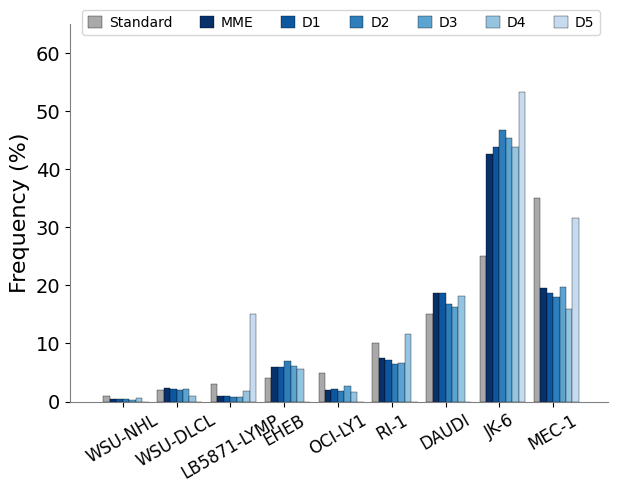

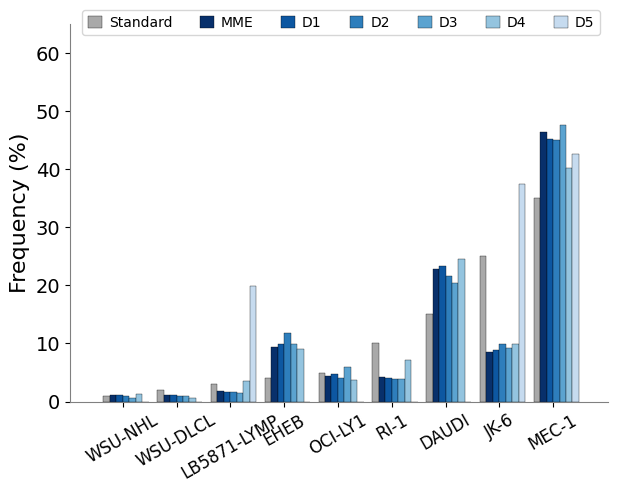

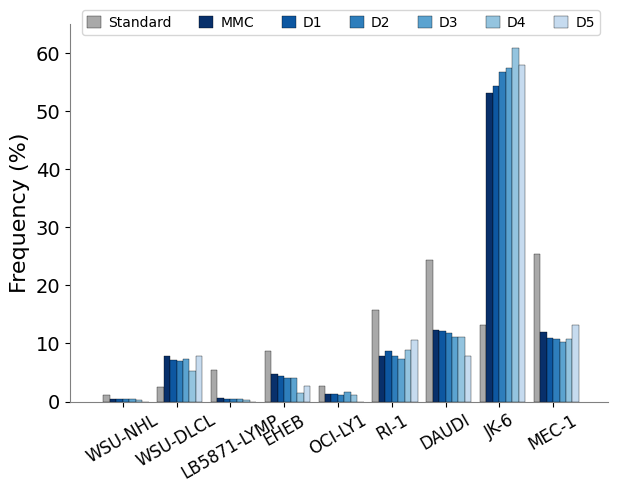

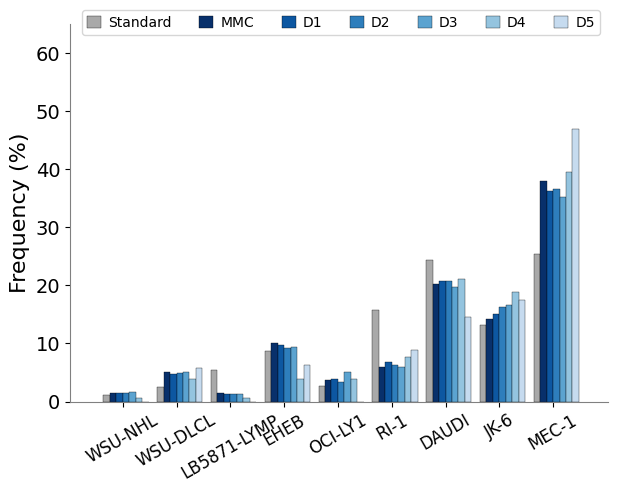

In [32]:



heavy_9cls = pd.read_csv("gen2_heavy_9cls_uni.csv", index_col=0)
# light_9cls = pd.read_csv("gen2_light_9cls_uni.csv", index_col=0)


cols = ['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1']
heavy_9cls = heavy_9cls.reindex(columns=cols)
# light_9cls = light_9cls.reindex(columns=cols)

new_order_h = [
    '2-MME-L1-HC', '2-MME-L2-HC', '2-MME-L3-HC', '2-D1-L1-HC', '2-D1-L2-HC', '2-D1-L3-HC', '2-D2-L1-HC', '2-D2-L2-HC', '2-D2-L3-HC',
    '2-D3-L1-HC', '2-D3-L2-HC', '2-D3-L3-HC', '2-D4-L1-HC', '2-D4-L2-HC', '2-D4-L3-HC', '2-D5-L1-HC', '2-D5-L2-HC', '2-D5-L3-HC',
    '2-PBMC-L1-HC', '2-PBMC-L2-HC', '2-PBMC-L3-HC', '3-MMC-L1-HC', '3-D1-L1-HC', '3-D2-L1-HC', '3-D3-L1-HC', '3-D4-L1-HC', '3-D5-L1-HC', '3-PBMC-L1-HC'
]
# new_order_l = [
#     '2-MME-L1-LC', '2-MME-L2-LC', '2-MME-L3-LC','2-D1-L1-LC', '2-D1-L2-LC', '2-D1-L3-LC',
#     '2-D2-L1-LC', '2-D2-L2-LC', '2-D2-L3-LC','2-D3-L1-LC', '2-D3-L2-LC', '2-D3-L3-LC',
#     '2-D4-L1-LC', '2-D4-L2-LC', '2-D4-L3-LC','2-D5-L1-LC', '2-D5-L2-LC', '2-D5-L3-LC',
#     '2-PBMC-L1-LC', '2-PBMC-L2-LC', '2-PBMC-L3-LC','3-MMC-L1-LC', '3-D1-L1-LC', '3-D2-L1-LC',
#     '3-D3-L1-LC', '3-D4-L1-LC', '3-D5-L1-LC', '3-PBMC-L1-LC']

heavy_9cls = heavy_9cls.reindex(new_order_h).fillna(0)
# light_9cls = light_9cls.reindex(new_order_l).fillna(0)

### normalization
def normalize_data(df, cols, chain_type='heavy'):
    tpm = pd.read_excel('BCR-SEQC_50_cell_lines_IG_TPM.xlsx', index_col=0)
    tpm = tpm.loc[cols]

    mean_heavy = tpm['Heavy'].mean()
    mean_light = tpm['Light'].mean()

    tpm['sf_mean_heavy'] = mean_heavy / tpm['Heavy']
    tpm['sf_mean_light'] = mean_light / tpm['Light']

    if chain_type == 'heavy':
        for col in df.columns:
            if col in tpm.index:
                df.loc[:, col] = df[col] * tpm.loc[col, 'sf_mean_heavy']
    elif chain_type == 'light':
        for col in df.columns:
            if col in tpm.index:
                df.loc[:, col] = df[col] * tpm.loc[col, 'sf_mean_light']
    else:
        raise ValueError("chain_type must be either 'heavy' or 'light'")

    return df


def convert_to_fraction(df, cols):
    df = df.fillna(0)
    df['total'] = df[cols].sum(axis=1)
    df[cols] = df[cols].div(df['total'], axis=0) * 100
    return df.drop(columns=['total']).fillna(0)

heavy_frac = convert_to_fraction(heavy_9cls, cols)
# light_frac = convert_to_fraction(light_9cls, cols)

heavy_9cls_norm = normalize_data(heavy_9cls.copy(), cols, chain_type='heavy')
heavy_frac_norm = convert_to_fraction(heavy_9cls_norm, cols)

heavy_frac_2 = heavy_frac[heavy_frac.index.str.startswith('2')]
heavy_frac_3 = heavy_frac[heavy_frac.index.str.startswith('3')]
heavy_frac_2_norm = heavy_frac_norm[heavy_frac_norm.index.str.startswith('2')]
heavy_frac_3_norm = heavy_frac_norm[heavy_frac_norm.index.str.startswith('3')]


def prepare_data_for_plotting(df, group_name):
    df = df[~df.index.str.contains('PBMC')].copy()
    if "frac_2" in group_name:
        df.loc["Standard"] = [1, 2, 3, 4, 5, 10, 15, 25, 35]
    else:
        df.loc["GEM-X 5' v3"] = [1.10, 2.58, 5.50, 8.66, 2.67, 15.70, 24.41, 13.14, 25.39]
    return df.T

df2 = prepare_data_for_plotting(heavy_frac_2, "heavy_frac_2")
df3 = prepare_data_for_plotting(heavy_frac_3, "heavy_frac_3")
df2_norm = prepare_data_for_plotting(heavy_frac_2_norm, "heavy_frac_2_norm")
df3_norm = prepare_data_for_plotting(heavy_frac_3_norm, "heavy_frac_3_norm")

colors = plt.cm.Blues(np.linspace(1, 0.1, 7))
plt.rcParams.update({'font.size': 14})

bar_width = 0.12
bar_positions = np.arange(len(df2.index)) - 0.5
rotate_deg=30
fig_h=5
fig_w=6.4
std_color='darkgray'
edge_color='black'  

# Plot for df2, un-normalized
fig, ax1 = plt.subplots(figsize=(fig_w, fig_h))
ax1.bar(bar_positions + bar_width, df2[df2.columns[-1]], color=std_color, edgecolor=edge_color, linewidth=0.25,  label=df2.columns[-1], \
        width=bar_width, align='edge')
for i in range(6):
    group_columns = [df2.columns[i*3 + j] for j in range(3)]
    group_data = df2[group_columns]
    group_mean = group_data.mean(axis=1)
    ax1.bar(bar_positions + (i+2)*bar_width, group_mean, color=colors[i], edgecolor=edge_color, linewidth=0.25,  label=group_columns[0], width=bar_width, align='edge')
ax1.set_xlim(-1, 9)
ax1.set_ylim(0, 65)
ax1.set_xticks(ticks=bar_positions + bar_width*(len(df2.columns)-1)/2-0.6)
ax1.set_xticklabels(['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1'], fontsize=12, rotation=rotate_deg)
ax1.spines['top'].set_color('gray')
ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')
ax1.spines['right'].set_color('gray')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Frequency (%)', fontsize=16)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, ['Standard', 'MME', 'D1', 'D2', 'D3', 'D4', 'D5'], fontsize=10, loc='upper center', ncol=7, \
           bbox_to_anchor=(0.55, 1.0), handletextpad=0.5, markerscale=0.5, handleheight=1, handlelength=1, labelspacing=0.1)
fig.tight_layout()
fig.savefig('Figure4C_MME_unnormalized.svg')
plt.show()

# Plot for df2, normalized
fig, ax3 = plt.subplots(figsize=(fig_w, fig_h))
ax3.bar(bar_positions + bar_width, df2_norm[df2_norm.columns[-1]], color=std_color, edgecolor=edge_color, linewidth=0.25,  \
        label=df2_norm.columns[-1], width=bar_width, align='edge')
for i in range(6):
    group_columns = [df2_norm.columns[i*3 + j] for j in range(3)]
    group_data = df2_norm[group_columns]
    group_mean = group_data.mean(axis=1)
    ax3.bar(bar_positions + (i+2)*bar_width, group_mean, color=colors[i], edgecolor=edge_color, linewidth=0.25,  label=group_columns[0], width=bar_width, align='edge')
ax3.set_xlim(-1, 9)
ax3.set_ylim(0, 65)
ax3.set_xticks(ticks=bar_positions + bar_width*(len(df2.columns)-1)/2-0.6)
ax3.set_xticklabels(['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1'], fontsize=12, rotation=rotate_deg)
ax3.spines['top'].set_color('gray')
ax3.spines['bottom'].set_color('gray')
ax3.spines['left'].set_color('gray')
ax3.spines['right'].set_color('gray')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('Frequency (%)', fontsize=16)
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, ['Standard', 'MME', 'D1', 'D2', 'D3', 'D4', 'D5'], fontsize=10, loc='upper center', ncol=7, \
           bbox_to_anchor=(0.55, 1.0), handletextpad=0.5, markerscale=0.5, handleheight=1, handlelength=1, labelspacing=0.1)
fig.tight_layout()
fig.savefig('Figure4C_MME_normalized.svg')
plt.show()

# Plot for df3, un-normalized
fig, ax2 = plt.subplots(figsize=(fig_w, fig_h))
ax2.bar(bar_positions + bar_width, df3[df3.columns[-1]], color=std_color, edgecolor=edge_color, linewidth=0.25,  label=df3.columns[-1], \
        width=bar_width, align='edge')
for i, column in enumerate(df3.columns[:-1]):
    ax2.bar(bar_positions + (i+2)*bar_width, df3[column], color=colors[i], edgecolor=edge_color, linewidth=0.25,  label=column, width=bar_width, align='edge')
ax2.set_xlim(-1, 9)
ax2.set_ylim(0, 65)
ax2.set_xticks(ticks=bar_positions + bar_width*(len(df2.columns)-1)/2-0.6)
ax2.set_xticklabels(['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1'], fontsize=12, rotation=rotate_deg)
ax2.spines['top'].set_color('gray')
ax2.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.spines['right'].set_color('gray')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Frequency (%)', fontsize=16)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, ['Standard', 'MMC', 'D1', 'D2', 'D3', 'D4', 'D5'], fontsize=10, loc='upper center', ncol=7, \
           bbox_to_anchor=(0.55, 1.0), handletextpad=0.5, markerscale=0.5, handleheight=1, handlelength=1, labelspacing=0.1)
fig.tight_layout()
fig.savefig('Figure4C_MMC_unnormalized.svg')
plt.show()

# Plot for df3, normalized
fig, ax4 = plt.subplots(figsize=(fig_w, fig_h))
ax4.bar(bar_positions + bar_width, df3_norm[df3_norm.columns[-1]], color=std_color, edgecolor=edge_color, linewidth=0.25,  \
        label=df3_norm.columns[-1], width=bar_width, align='edge')
for i, column in enumerate(df3_norm.columns[:-1]):
    ax4.bar(bar_positions + (i+2)*bar_width, df3_norm[column], color=colors[i], edgecolor=edge_color, linewidth=0.25,  label=column, width=bar_width, align='edge')
ax4.set_xlim(-1, 9)
ax4.set_ylim(0, 65)
ax4.set_xticks(ticks=bar_positions + bar_width*(len(df2.columns)-1)/2-0.6)
ax4.set_xticklabels(['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1'], fontsize=12, rotation=rotate_deg)
ax4.spines['top'].set_color('gray')
ax4.spines['bottom'].set_color('gray')
ax4.spines['left'].set_color('gray')
ax4.spines['right'].set_color('gray')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_ylabel('Frequency (%)', fontsize=16)
handles, labels = ax4.get_legend_handles_labels()
fig.legend(handles, ['Standard', 'MMC', 'D1', 'D2', 'D3', 'D4', 'D5'], fontsize=10, loc='upper center', ncol=7, \
           bbox_to_anchor=(0.55, 1.0), handletextpad=0.5, markerscale=0.5, handleheight=1, handlelength=1, labelspacing=0.1)
fig.tight_layout()
fig.savefig('Figure4C_MMC_normalized.svg')
plt.show()


In [51]:
df3

,3-MMC-L1-HC,3-D1-L1-HC,3-D2-L1-HC,3-D3-L1-HC,3-D4-L1-HC,3-D5-L1-HC,GEM-X 5' v3
WSU-NHL,0.468520,0.470849,0.448713,0.485925,0.193050,0.000000,1.10
WSU-DLCL,7.771442,7.137553,6.959562,7.288874,5.212355,7.894737,2.58
LB5871-LYMP,0.617388,0.513040,0.459526,0.502681,0.193050,0.000000,5.50
EHEB,4.692569,4.377152,3.984358,4.038204,1.544402,2.631579,8.66
OCI-LY1,1.255116,1.274724,1.072227,1.591823,1.158301,0.000000,2.67
RI-1,7.781261,8.629981,7.824551,7.272118,8.880309,10.526316,15.70
DAUDI,12.294102,12.200446,11.787285,11.159517,11.196911,7.894737,24.41
JK-6,53.135510,54.373214,56.674836,57.355898,60.810811,57.894737,13.14
MEC-1,11.984093,11.023042,10.788943,10.304960,10.810811,13.157895,25.39
